# Classification Tree using *tree* library

In [2]:
library(tree)

## Using iris dataset
- Create a classification tree of Species based on various sizes

In [3]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [5]:
f <- tree(Species ~ ., data = iris)
f

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 )  
        24) Sepal.Length < 5.15 5   5.004 versicolor ( 0.00000 0.80000 0.20000 ) *
        25) Sepal.Length > 5.15 43   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 )  
      14) Petal.Length < 4.95 6   5.407 virginica ( 0.00000 0.16667 0.83333 ) *
      15) Petal.Length > 4.95 40   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

## Plot the tree
- Adjust the vertical spacing between each branch to fit the labels on the plot
- Add labels with *text()* with *all=TRUE* (adding labels to every node)

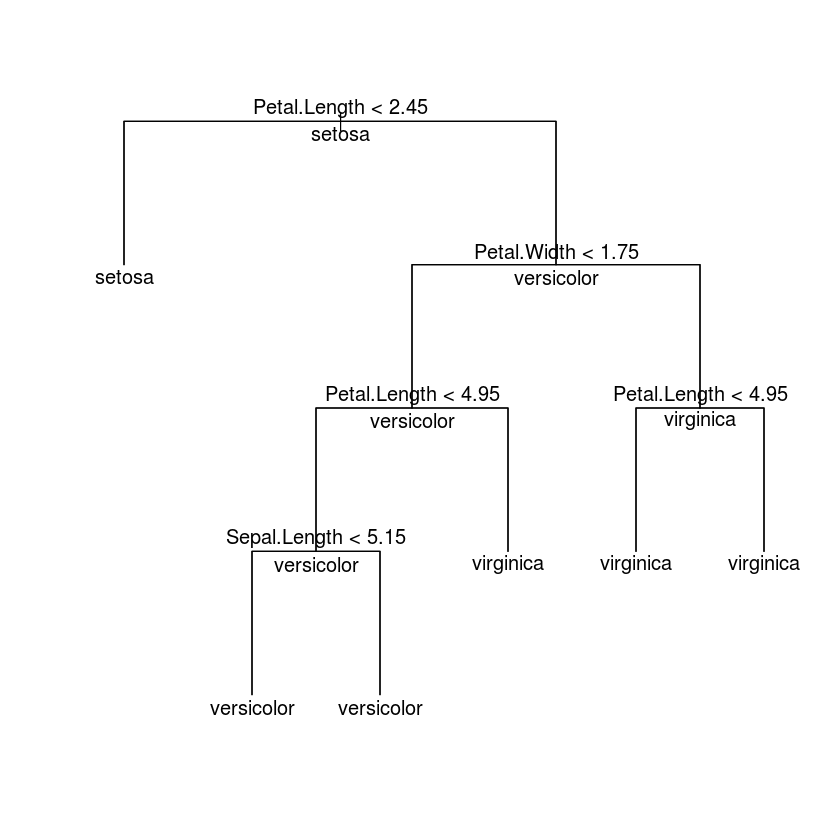

In [6]:
plot(f, type = "uniform")
text(f, all = TRUE)

<hr>

# Regression Tree using *tree* package

## Use Regression tree to classify continous data on builtin dataset mtcars
- Look at "mpg" based on various factors

In [7]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [8]:
f <- tree(mpg ~ ., data = mtcars)
f

node), split, n, deviance, yval
      * denotes terminal node

 1) root 32 1126.000 20.09  
   2) wt < 2.26 6   44.550 30.07 *
   3) wt > 2.26 26  346.600 17.79  
     6) cyl < 7 12   42.120 20.92  
      12) cyl < 5 5    5.968 22.58 *
      13) cyl > 5 7   12.680 19.74 *
     7) cyl > 7 14   85.200 15.10  
      14) hp < 192.5 7   16.590 16.79 *
      15) hp > 192.5 7   28.830 13.41 *

## Plot the tree
- Adjust the vertical spacing between each branch to fit the labels on the plot
- Add labels with *text()* with *all=TRUE* (adding labels to every node)

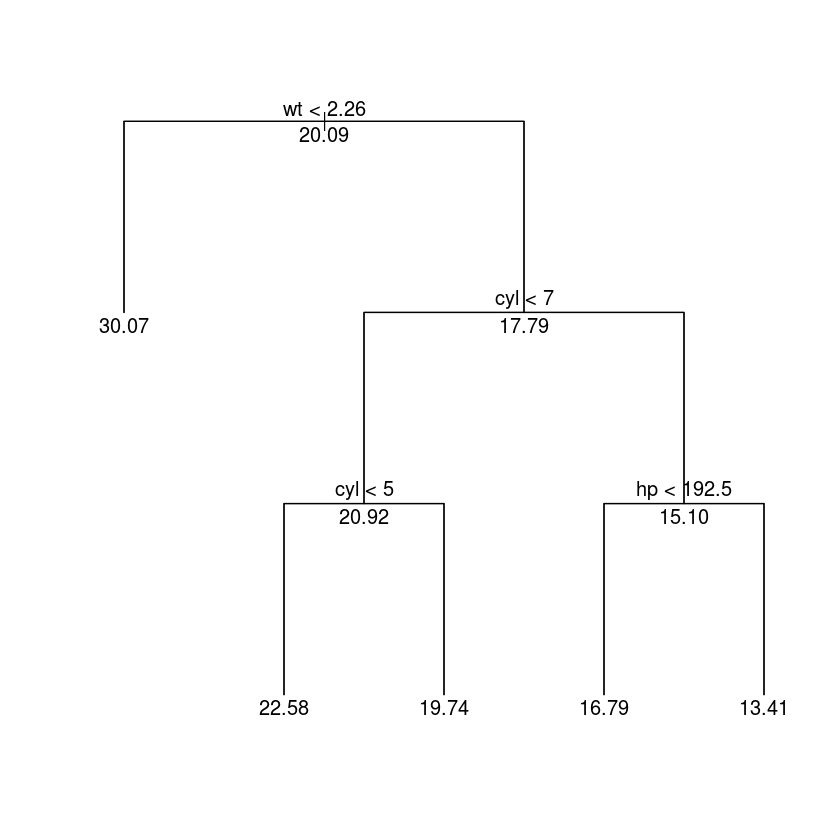

In [9]:
plot(f, type = "uniform")
text(f, all = TRUE)

## Prune the tree to 3 nodes to reduce overfitting
- Plot the same way

In [10]:
f_prune <- prune.tree(f, best = 3)
f_prune

node), split, n, deviance, yval
      * denotes terminal node

1) root 32 1126.00 20.09  
  2) wt < 2.26 6   44.55 30.07 *
  3) wt > 2.26 26  346.60 17.79  
    6) cyl < 7 12   42.12 20.92 *
    7) cyl > 7 14   85.20 15.10 *

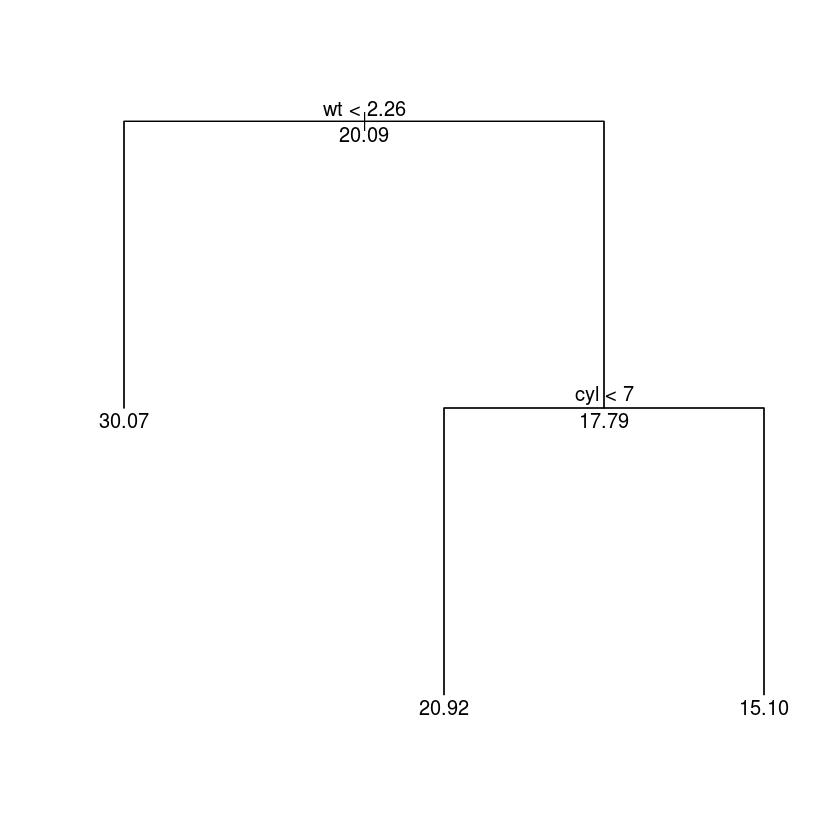

In [11]:
plot(f_prune, type = "uniform")
text(f_prune, all = TRUE)

### *rpart* package produces more pruned trees compared to the *tree* package